[ 28 210  42] 28 42


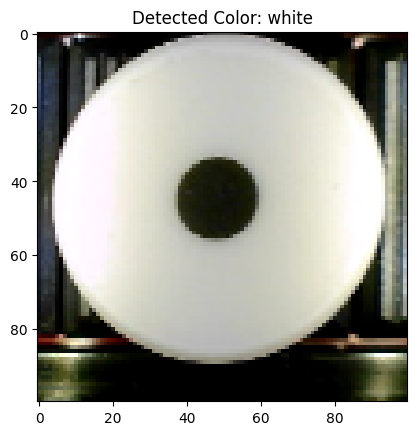

In [1]:
import cv2
import matplotlib.pyplot as plt
from ObjectDetector import ObjectDetector

# Path to the image
img_path = "data/test/test_four_label/blue/blue_016.jpg"
img_path = "data/test/test_four_label/red/red_001.jpg"
img_path = "data/test/test_four_label/white/white_015.jpg"

# Path to the Haar Cascade file
cascade_path = "opencv-cascade/classifier/cascade.xml"

# Label dictionary
label_dict = {1: 'white', 2: 'red', 3: 'blue'}

# Initialize the ObjectDetector
classifier = ObjectDetector(cascade_path, 
                            minSize=(80,80), 
                            label_dict=label_dict,
                            minNeighbors=5,
                        )

# Get the largest object in the image and its color
largest_object, image = classifier.get_largest_object(img_path)
if largest_object is not None:
    x, y, w, h = largest_object
    cropped_image = classifier.get_cropped_image(image, largest_object)
    cropped_image = cv2.resize(cropped_image, (100, 100))
else:
    cropped_image = cv2.resize(image, (100, 100))

detected_color = classifier.detect_color(cropped_image)

# Display the image with the detected color
plt.title(f"Detected Color: {detected_color}")
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()


[157 198  20] 157 20
[ 11 196  17] 11 17
[32 95 16] 32 16
[ 30 199  14] 30 14
[168 195  11] 168 11
[152 207  34] 152 34
[ 39 161  19] 39 19
[30 94 15] 30 15
[30 94 16] 30 16
[ 30 203  25] 30 25
[34 86 25] 34 25
[ 32 166  17] 32 17
[168 195  11] 168 11
[159 198  22] 159 22
[ 13 196  19] 13 19
[159 198  22] 159 22
[ 35 202  26] 35 26
[ 34 157  21] 34 21
[147 225  43] 147 43
[ 35 167   9] 35 9
[ 30 155  11] 30 11
[177 192  18] 177 18
[152 207  34] 152 34
[ 30 189  17] 30 17
[147 225  43] 147 43
[ 28 157  23] 28 23
[34 86 25] 34 25
[147 225  43] 147 43
[ 35 206  33] 35 33
[155 212  36] 155 36
[155 207  34] 155 34
[152 207  34] 152 34
[ 30 196  17] 30 17
[ 30 155  20] 30 20
[ 32 156  18] 32 18
[ 35 184  30] 35 30
[32 94 18] 32 18
[ 19 183  19] 19 19
[33 85 27] 33 27
[ 32 162  20] 32 20
[32 94 18] 32 18
[155 212  36] 155 36
[159 198  22] 159 22
[177 192  18] 177 18
[155 207  34] 155 34
[ 35 154  21] 35 21
[34 86 25] 34 25
[ 30 196  26] 30 26
[177 192  18] 177 18
[ 38 172  17] 38 17
[ 37 181 

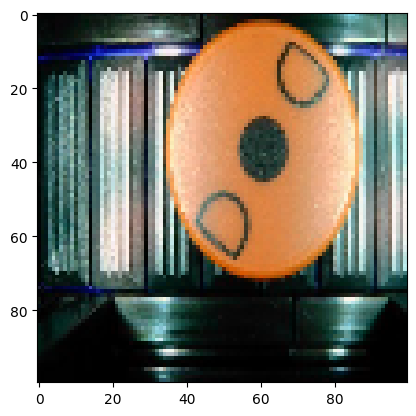

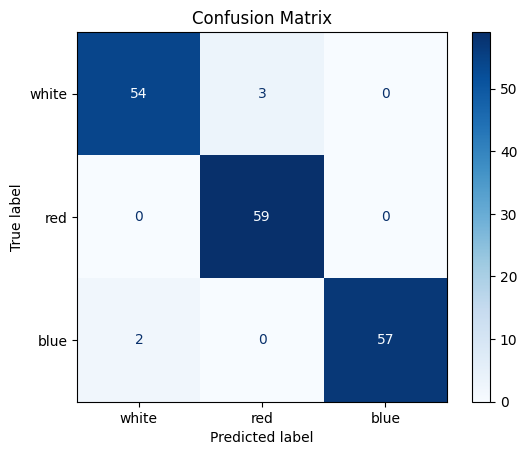

In [2]:
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def load_images_from_folder(folder, true_label):
    """
    Loads images from a given folder and associates them with a true label.

    Args:
        folder (str): Path to the folder containing images.
        true_label (str): The true label for the images in the folder.

    Returns:
        list of tuples: List of (image, true_label) tuples.
    """
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            images.append((img_path, true_label))
    return images

def evaluate_detector(detector, dataset_folder):
    """
    Evaluates the ObjectDetector's color detection accuracy on a dataset and prepares data for a confusion matrix.

    Args:
        detector (ObjectDetector): The ObjectDetector instance to evaluate.
        dataset_folder (str): Path to the folder containing subfolders with labeled images.

    Returns:
        tuple: List of true labels and list of predicted labels.
    """
    label_dict = detector.label_dict
    true_labels = []
    predicted_labels = []

    for color_label in label_dict.values():
        folder_path = os.path.join(dataset_folder, color_label)
        images = load_images_from_folder(folder_path, color_label)

        for img_path, true_label in images:
            _, image = detector.get_largest_object(img_path)
            if image is not None:

                # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                detected_label = detector.detect_color(image)
                true_labels.append(true_label)
                predicted_labels.append(detected_label)

    return true_labels, predicted_labels

def plot_confusion_matrix(true_labels, predicted_labels, label_dict):
    """
    Plots a confusion matrix for the given true and predicted labels.

    Args:
        true_labels (list): List of true labels.
        predicted_labels (list): List of predicted labels.
        label_dict (dict): Dictionary to resolve integers to corresponding color labels.
    """
    labels = list(label_dict.values())
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title('Confusion Matrix')
    plt.show()

dataset_folder = 'data/test/test_four_label/'
true_labels, predicted_labels = evaluate_detector(classifier, dataset_folder)
plot_confusion_matrix(true_labels, predicted_labels, label_dict)

In [3]:
from sklearn.metrics import accuracy_score, top_k_accuracy_score

# Calculate the accuracy of the ObjectDetector
accuracy = accuracy_score(true_labels, predicted_labels)

print(f"Accuracy: {accuracy}")

# Calculate the top-1 accuracy of the ObjectDetector
# top1_accuracy = top_k_accuracy_score(true_labels, predicted_labels, k=1)


Accuracy: 0.9714285714285714
